# 01 Explore
---

In [11]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
data_path="/Users/Manita/OneDrive - NOVAIMS/machine learning/Project_02/data/alcohol_children.xlsx"

alcohol_child =pd.read_excel(data_path, index_col=0)

In [13]:
alcohol_child.head(5)

,country,gender,smoking,first_drunk,alcopops,been_drunk,canabis,exercise,family_well,life_sas,...,talk_mother,talk_father,evenings,year_collect,code,gdp_pcapita,urban_pop,teen_preg,out_school,educ_expense
0,Albania,1,4.4,12.5,2.3,10.7,10.0,34.7,3.282,8.139,...,89.2,81.0,36.6,2014,ALB,4578.667934,56.423,20.7048,6.19974,NaN
1,Albania,0,1.2,5.5,0.9,3.9,1.4,20.3,3.303,8.278,...,91.7,61.4,10.7,2014,ALB,4578.667934,56.423,20.7048,6.19974,NaN
2,Austria,1,6.4,7.2,4.4,10.9,12.5,72.4,3.933,8.143,...,84.9,73.4,30.9,2014,AUT,51717.495941,57.526,7.8360,3.10438,5.44898
3,Austria,0,6.8,4.2,3.6,8.8,7.9,59.2,3.792,7.791,...,82.5,57.1,24.4,2014,AUT,51717.495941,57.526,7.8360,3.10438,5.44898
4,Armenia,1,3.3,7.9,NaN,11.9,3.8,44.2,3.958,8.621,...,83.1,80.9,31.5,2014,ARM,3994.712355,63.112,25.5950,NaN,2.24724


# 1. Split Data
---

In [14]:

from sklearn.model_selection import train_test_split 

seed = 0

test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(alcohol_child.drop(columns = ['alcopops']),
                                                    alcohol_child['alcopops'],
                                                    test_size=test_size,
                                                    random_state=seed)


"\nfrom sklearn.model_selection import train_test_split \n\nseed = 0\n\ntest_size = 0.1\n\nx_train, x_test, y_train, y_test = train_test_split(alcohol_child.drop(columns = ['alcopops']),\n                                                    alcohol_child['alcopops'],\n                                                    test_size=test_size,\n                                                    random_state=seed)\n"

In [5]:
df = pd.concat([x_train,y_train], axis = 1)

# export to csv test partition

df_test = pd.concat([x_test, y_test], axis = 1)
df_test.to_excel("df_TEST.xlsx")

print('Train Nr. obs:\t{}\t==> {:.2%} of Data'.format(df.shape[0],df.shape[0]/2240))
print('Test Nr. obs:\t{}\t==> {:.2%} of Data'.format(df_test.shape[0],df_test.shape[0]/2240))
print('Number of features:', df.shape[1])

Train Nr. obs:	219	==> 9.78% of Data
Test Nr. obs:	25	==> 1.12% of Data
Number of features: 22


In [6]:
# DataFrame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 203 to 172
Data columns (total 22 columns):
country           219 non-null object
gender            219 non-null int64
smoking           216 non-null float64
first_drunk       208 non-null float64
been_drunk        215 non-null float64
canabis           204 non-null float64
exercise          217 non-null float64
family_well       219 non-null float64
life_sas          215 non-null float64
school_achieve    219 non-null float64
sex               202 non-null float64
talk_mother       215 non-null float64
talk_father       215 non-null float64
evenings          213 non-null float64
year_collect      219 non-null int64
code              219 non-null object
gdp_pcapita       219 non-null float64
urban_pop         219 non-null float64
teen_preg         213 non-null float64
out_school        169 non-null float64
educ_expense      168 non-null float64
alcopops          209 non-null float64
dtypes: float64(18), int64(2), object(2)


In [7]:
# Numerical Variables Description
df.describe()

,gender,smoking,first_drunk,been_drunk,canabis,exercise,family_well,life_sas,school_achieve,sex,talk_mother,talk_father,evenings,year_collect,gdp_pcapita,urban_pop,teen_preg,out_school,educ_expense,alcopops
count,219.000000,216.000000,208.000000,215.000000,204.000000,217.000000,219.000000,215.000000,219.000000,202.000000,215.000000,215.000000,213.000000,219.000000,219.000000,219.000000,213.000000,169.000000,168.000000,209.000000
mean,0.493151,7.585648,12.232692,13.245116,14.485294,51.373272,3.634119,7.615084,65.402740,22.968317,81.586977,63.079535,21.998592,2010.018265,34164.671777,74.251868,15.252040,2.305834,5.359835,4.138756
std,0.501098,4.442284,7.101316,6.258001,7.996094,14.296922,0.296844,0.337523,10.076969,10.357941,5.357388,11.510769,13.106687,3.306878,22881.069303,12.976442,9.527508,2.608090,1.218625,2.851734
min,0.000000,0.400000,1.600000,2.100000,0.000000,20.000000,3.009000,6.711000,44.400000,0.800000,65.500000,35.900000,1.300000,2006.000000,2244.755308,42.496000,3.297400,0.021840,2.247240,0.500000
25%,0.000000,4.800000,6.700000,8.400000,8.575000,41.800000,3.452000,7.401000,58.050000,15.800000,78.400000,54.350000,11.400000,2006.000000,13769.483828,63.112000,7.836000,0.518170,4.631950,1.900000
50%,0.000000,6.800000,10.950000,12.000000,13.600000,52.200000,3.654000,7.597000,66.200000,23.050000,82.000000,64.100000,20.800000,2010.000000,37733.856576,73.950000,12.376400,1.363610,5.288690,3.400000
75%,1.000000,9.025000,16.600000,17.950000,19.875000,61.400000,3.841500,7.822000,72.500000,28.475000,85.800000,71.500000,30.300000,2014.000000,47355.312006,83.636000,20.704800,2.939020,5.781375,5.900000
max,1.000000,35.900000,37.500000,30.900000,35.500000,82.200000,4.448000,8.693000,92.300000,64.200000,91.700000,84.500000,60.800000,2014.000000,118823.648369,97.833000,43.475200,14.255070,8.559550,17.100000


In [8]:
print("Alcohol frequency country rate: {}%".format(round(df["alcopops"].mean(), 2)))

Alcohol frequency country rate: 4.14%


# 2. Missing Values
---

In [9]:
def missing_values_reporter(df):    
    na_count = df.isna().sum() 
    ser = na_count[na_count > 0]
    ser_p = np.round(ser.divide(df.shape[0])*100,2)
    tmp = pd.DataFrame({"N missings": ser,"% missings": ser_p,"Above Threshold (3%)": False})
    tmp.loc[tmp["% missings"] > 3., 'Above Threshold (3%)'] = 'True' 
    return tmp


def plot_missing(df_miss, cutoff_ = 3):
    cutoff_list = [cutoff_, cutoff_]
    #plt.figure(figsize=(15,5))
    ax = df_miss.sort_values('% missings', ascending=False).plot.bar(y="% missings", 
                                                                     color="Grey",
                                                                     alpha = 0.9,
                                                                     title="{}% cutoff line on missing values".format(cutoff_),
                                                                     legend=False,figsize = (10,4))
    ax.set_xlabel("Features with missing values", size=12)
    ax.set_ylabel("Proportion of missings")
    ax.plot([-1, len(df_miss.index)], cutoff_list,'r--', lw=2)
    ax.set_xticklabels(df_miss.sort_values('% missings', ascending=False).index, rotation=60, size=9)
    plt.show()


In [10]:
df_miss = missing_values_reporter(df)
df_miss

,N missings,% missings,Above Threshold (3%)
smoking,3,1.37,False
first_drunk,11,5.02,True
been_drunk,4,1.83,False
canabis,15,6.85,True
exercise,2,0.91,False
life_sas,4,1.83,False
sex,17,7.76,True
talk_mother,4,1.83,False
talk_father,4,1.83,False
evenings,6,2.74,False


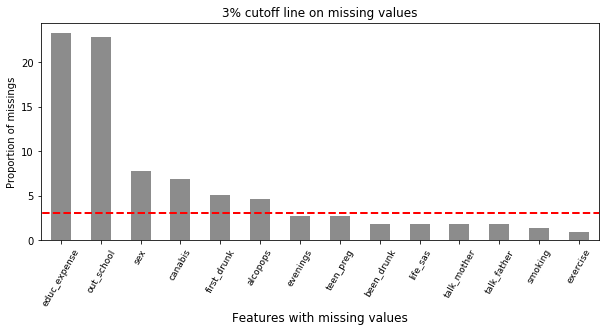

In [11]:
plot_missing(df_miss)

## ////////////////////////////////////////////////////////////////////////////////////////////

In [12]:
describe_num=df.describe(percentiles=np.arange(0.2, .8, .2))
display(describe_num)

,gender,smoking,first_drunk,been_drunk,canabis,exercise,family_well,life_sas,school_achieve,sex,talk_mother,talk_father,evenings,year_collect,gdp_pcapita,urban_pop,teen_preg,out_school,educ_expense,alcopops
count,219.000000,216.000000,208.000000,215.000000,204.000000,217.000000,219.000000,215.000000,219.000000,202.000000,215.000000,215.000000,213.000000,219.000000,219.000000,219.000000,213.000000,169.000000,168.000000,209.000000
mean,0.493151,7.585648,12.232692,13.245116,14.485294,51.373272,3.634119,7.615084,65.402740,22.968317,81.586977,63.079535,21.998592,2010.018265,34164.671777,74.251868,15.252040,2.305834,5.359835,4.138756
std,0.501098,4.442284,7.101316,6.258001,7.996094,14.296922,0.296844,0.337523,10.076969,10.357941,5.357388,11.510769,13.106687,3.306878,22881.069303,12.976442,9.527508,2.608090,1.218625,2.851734
min,0.000000,0.400000,1.600000,2.100000,0.000000,20.000000,3.009000,6.711000,44.400000,0.800000,65.500000,35.900000,1.300000,2006.000000,2244.755308,42.496000,3.297400,0.021840,2.247240,0.500000
20%,0.000000,4.400000,5.840000,7.780000,6.600000,39.660000,3.379000,7.347400,55.600000,14.380000,77.780000,52.160000,10.440000,2006.000000,11984.868570,60.830400,7.172280,0.413160,4.279900,1.700000
40%,0.000000,6.100000,9.580000,10.600000,11.820000,47.580000,3.579800,7.528600,63.240000,19.560000,79.960000,60.180000,16.460000,2010.000000,22538.654077,70.346600,10.507120,0.900084,5.020860,2.800000
50%,0.000000,6.800000,10.950000,12.000000,13.600000,52.200000,3.654000,7.597000,66.200000,23.050000,82.000000,64.100000,20.800000,2010.000000,37733.856576,73.950000,12.376400,1.363610,5.288690,3.400000
60.0%,1.000000,7.900000,12.720000,13.400000,15.600000,55.460000,3.717600,7.656000,68.500000,24.560000,83.600000,67.040000,24.860000,2010.000000,42764.033439,80.099000,15.645600,1.950820,5.515510,4.100000
80%,1.000000,9.900000,18.460000,19.100000,21.540000,63.280000,3.922800,7.904800,74.040000,30.780000,86.500000,73.400000,33.300000,2014.000000,50112.105007,85.430200,21.739080,4.130700,6.314888,6.500000
max,1.000000,35.900000,37.500000,30.900000,35.500000,82.200000,4.448000,8.693000,92.300000,64.200000,91.700000,84.500000,60.800000,2014.000000,118823.648369,97.833000,43.475200,14.255070,8.559550,17.100000


In [13]:
const=describe_num.columns[describe_num.loc["std"]<0.01]
print("Columns with zero or almost zero variance to be removed:\n", 
      list(const))

# remove constants
df.drop(labels=const, axis=1, inplace=True) 

# test

df_test.drop(labels=const, axis=1, inplace=True)

Columns with zero or almost zero variance to be removed:
 []


In [14]:
# Negative features == > meter a zero
print(">>> Any column with negative values?:", 
      (df._get_numeric_data()<0).any().any())

>>> Any column with negative values?: False


# 3. Correlation

In [15]:
def plot_corr(df,cmap = sns.diverging_palette(20, 220, sep = 20, as_cmap=True)):  
    corr = np.round(df.corr(), 1)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        plt.figure(figsize = (15,10))
        sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                linewidths=0, annot= True,mask=mask,square=False, cmap = cmap)
    plt.title("Correlation", loc = "left", fontweight = "bold")
    plt.show()

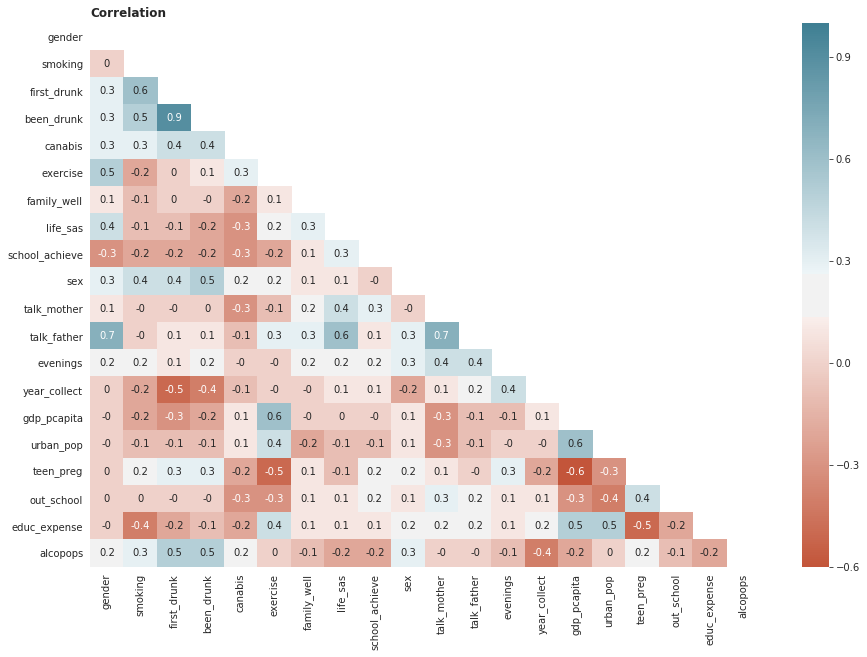

In [16]:
plot_corr(df)

In [17]:
# drop country and country code

df.drop(columns = ['country','code'], inplace=True)
df_test.drop(columns = ['country','code'], inplace=True)


In [18]:
df.to_excel("df_01.xlsx")
df_test.to_excel('df_test_01.xlsx')